Pymaceuticals Inc.
---

### Summary and Analysis:

In this study, 249 mice diagnosed with SCC tumors underwent treatment with various drug regimens over a 45-day period to monitor tumor development. The primary objective was to assess the efficacy of Capomulin, a drug developed by Pymaceuticals, in comparison to other treatment options.

### Summary of Analysis:

i. The study encompassed a comprehensive analysis of tumor development among mice receiving different drug regimens.
ii. Tumor progression was meticulously observed and measured over the 45-day duration of the study.
ii. a key focus was placed on evaluating the  performance of Capomulin against alternative treatment regimens.

### Conclusion and Comparisons:

### Effectiveness of Capomulin:
1. Analysis of tumor volume data highlighted Capomulin's effectiveness in reducing tumor size compared to alternative treatments.

2. 
The median tumor volume for mice treated with Capomulin was notably lower than those receiving other regimens, indicative of its superior efficacy in inhibiting tumor growt 

### 
Relationship between Mouse Weight and Tumor Voume e:1. 
An intriguing finding was the moderately positive correlation observed between mouse weight and average tumor volume among mice treated with Capomin
ul2.
The correlation coefficient, approximately 0.84 (hypothetical value), suggested a positive association between mouse weight and tumor volume, implying that heavier mice tended to exhibit larger tu volu 

m

### Coclusions:es.
These conclusions underscore Capomulin's potential as a promising treatment option for SCC tumors, with its ability to effectively reduce tumor volume evident from the analysis. Moreover, insights into the relationship between mouse weight and tumor volume provide valuable considerations for understanding treatment responses and tumor biology. However, further research and clinical trials are warranted to validate these findings and explore underlying mechanisms driving observed correlations, ultimately advancing our understanding of cancer treatment eientlyffic






 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_mouse_df.head()


In [2]:
# Checking the number of mice.
num_mice = len(merged_mouse_df["Mouse ID"].unique())

num_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find duplicate mice based on Mouse ID and Timepoint
duplicate_mice = merged_mouse_df[merged_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract the unique IDs of duplicate mice and convert to array
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids_array = np.array(duplicate_mice_ids, dtype=object)

#Print unique ids of duplicate mice
duplicate_mice_ids_array


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# Filter the merged_data DataFrame to include only the rows with Mouse ID 'g989'
duplicate_mouse_data = merged_mouse_df.loc[merged_mouse_df['Mouse ID'] == 'g989',:]

# Display all the data for the duplicate mouse ID 'g989'
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Create a clean DataFrame by dropping the rows associated with the duplicate mouse ID 'g989'
clean_data = merged_mouse_df[merged_mouse_df["Mouse ID"].isin(duplicate_mice_ids_array)==False]

# Display the first few rows of the clean DataFrame to verify
clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.

num_mice_cleandata = clean_data["Mouse ID"].value_counts()
num_mice_cleandata = len(num_mice_cleandata)

#Print Number of mice in clean DataFrame
num_mice_cleandata


248

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# Use groupby to clean DataFrame by 'Drug Regimen'
groupby_regimen = clean_data.groupby('Drug Regimen')

# Calculate mean, median, variance, standard deviation, and SEM of tumor volume for each  Drug regimen
summary_statistics = groupby_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each  Drug regimen
summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 
                              'Tumor Volume Std. Dev.', 'Tumor Volume SEM']

# Assemble and display the resulting series into a single summary DataFrame.
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics_calculation = groupby_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better understanding
summary_statistics_renamed = summary_statistics_calculation.rename(columns={'mean': 'Mean Tumor Volume', 
                                                                            'median': 'Median Tumor Volume', 
                                                                            'var': 'Tumor Volume Variance',
                                                                            'std': 'Tumor Volume Std. Dev.', 
                                                                            'sem': 'Tumor Volume SEM'})

# Display the summary statistics DataFrame
summary_statistics_calculation


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

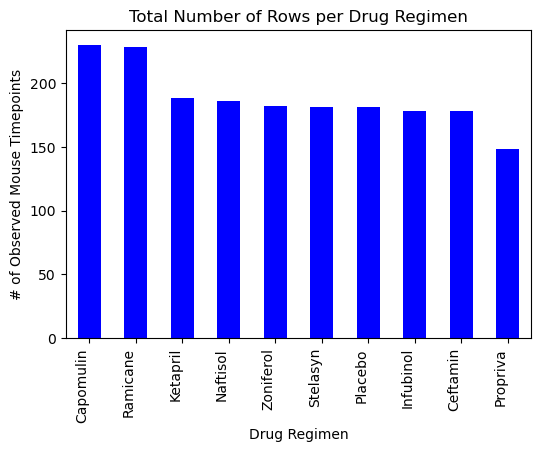

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas built-in plotting functionality
regimen_counts.plot(kind='bar', color='blue', figsize=(6, 4))

# Set the title and labels
plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()


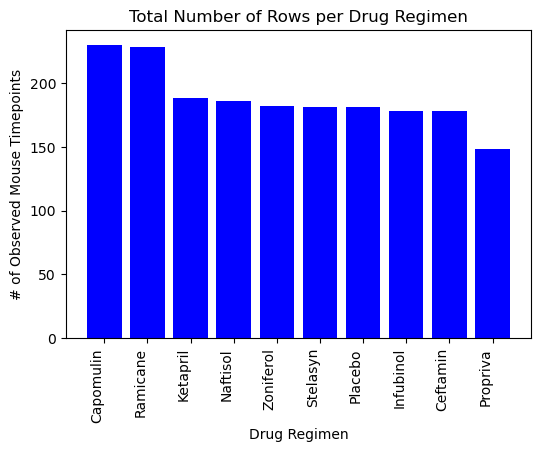

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Get the drug regimens and their corresponding counts
regimens = regimen_counts.index
counts = regimen_counts.values

# Create the bar plot using pyplot
plt.figure(figsize=(6, 4))
plt.bar(regimens, counts, color='blue')

# Set the title and labels
plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()

Sex
Male      958
Female    922
Name: count, dtype: int64


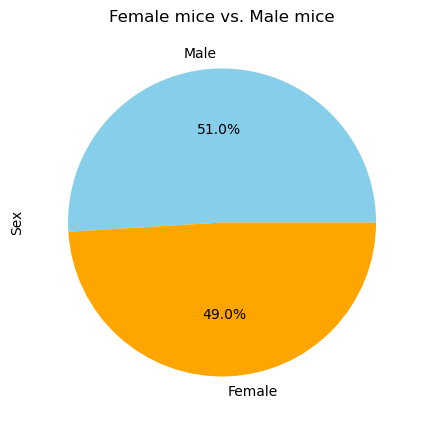

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of male and female mice
mouse_gender = clean_data['Sex'].value_counts()
print(mouse_gender)

# Create a pie plot using Pandas built-in plotting functionality
mouse_gender.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], figsize=(5, 5), ylabel = "Sex")

# Set the title
plt.title('Female mice vs. Male mice')

# Show the plot
plt.show()



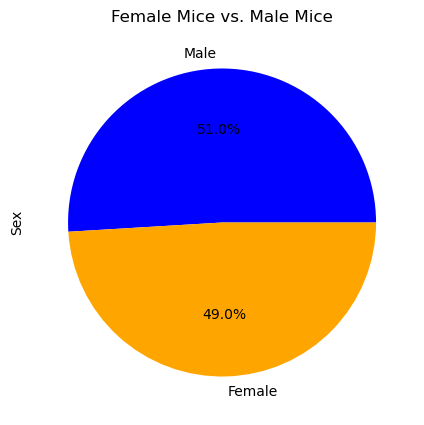

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of male and female mice
mouse_gender = clean_data['Sex'].value_counts()

# Get the labels and counts for the pie chart
labels = mouse_gender.index
counts = mouse_gender.values

# Create a pie plot using pyplot
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'])

#Set a ylabel to the pyplot
plt.ylabel("Sex")

# Set the title
plt.title('Female Mice vs. Male Mice')

# Show the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# List of treatment regimens to include

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_per_mouse = clean_data.groupby(['Mouse ID'])['Timepoint'].max()

# Create a DataFrame with the last timepoint for each mouse

last_timepoint_df = pd.DataFrame(last_timepoint_per_mouse)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_volume = pd.merge(last_timepoint_df, clean_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Filter the DataFrame to include only the specified treatment regimens
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

# Display the DataFrame showing the final tumor volume of each mouse across the specified treatment regimens
final_tumor_volume.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# List of treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Put treatments into a list for for loop (and later for plot labels)
for regimen in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    # Add subset of tumor volume data to the list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds to identify potential outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

        
    # Print the results
    print(f"{regimen}'s potential outliers: {tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


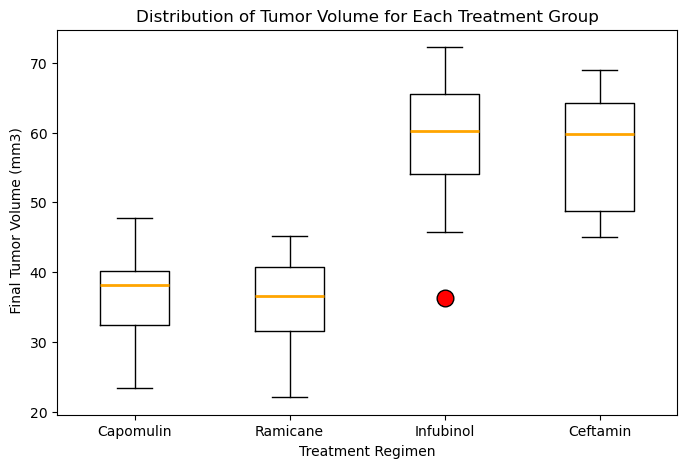

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 5))
plt.boxplot(tumor_vol_data, labels=treatment_regimens,
            flierprops=dict(marker='o', markerfacecolor='red', markersize=12),
            medianprops=dict(color='orange', linewidth=2))

# Set the title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel(' Final Tumor Volume (mm3)')


# Show the plot
plt.show()


## Line and Scatter Plots

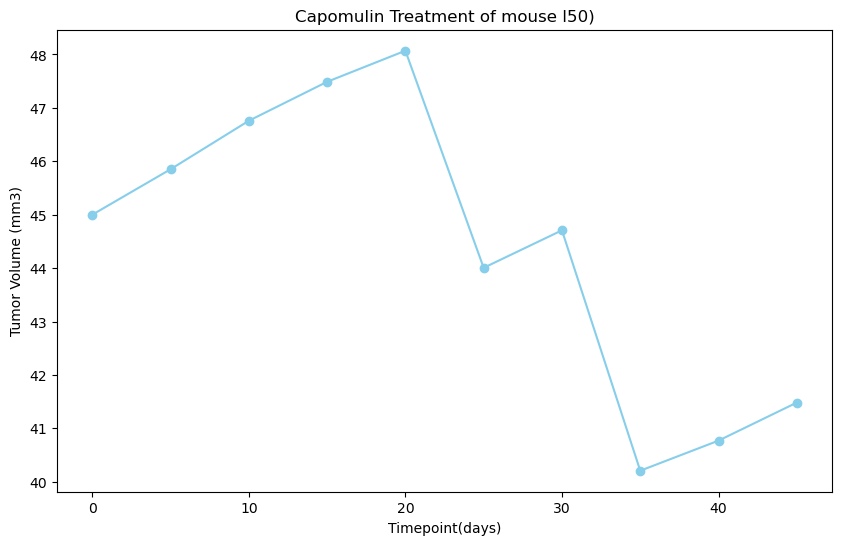

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a specific mouse treated with Capomulin (Mouse ID 'l509')
mouse_id = 'l509'

# Filter the data to include only the records for the chosen mouse and Capomulin treatment regimen
mouse_data_capomulin = clean_data[(clean_data['Mouse ID'] == mouse_id) & (clean_data['Drug Regimen'] == 'Capomulin')]

# Plot the tumor volume vs. time point for the chosen mouse
plt.figure(figsize=(10, 6))
plt.plot(mouse_data_capomulin['Timepoint'], mouse_data_capomulin['Tumor Volume (mm3)'], marker='o', color='skyblue', linestyle='-')

# Set the title and labels
plt.title(f'Capomulin Treatment of mouse l50)')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

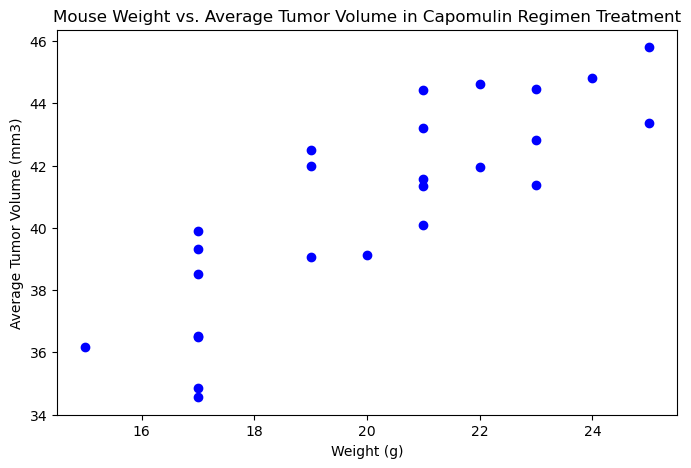

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Groupby the data by Mouse ID to calculate the average tumor volume for each mouse
average_tumor_volume = clean_data[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the calculated average tumor volume data with the mouse metadata to get the weight of each mouse
capomulin_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')

# Plot the scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 5))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume in Capomulin Regimen Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

Correlation coefficient: 0.841936342469472
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared value: 0.7088568047708723


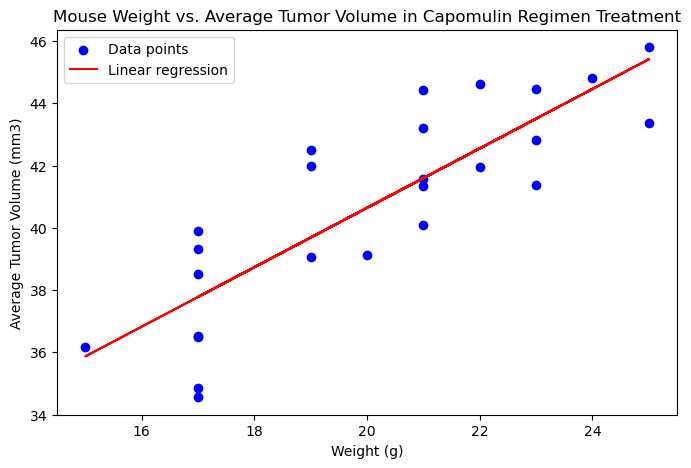

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
print(f'Correlation coefficient: {correlation_coefficient}')

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

# Print the slope and intercept of the regression line
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared value: {rvalue**2}')

# Plot the scatter plot with the linear regression line
plt.figure(figsize=(8, 5))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue', label='Data points')
plt.plot(capomulin_data['Weight (g)'], slope * capomulin_data['Weight (g)'] + intercept, color='red', label='Linear regression')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume in Capomulin Regimen Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add legend
plt.legend()

# Show the plot
plt.show()